In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install -q pandas
!pip3 install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
!pip3 install livelossplot

ERROR: torch-0.4.1-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.


In [ ]:
!pip3 install torchvision
!pip3 install livelossplot

In [3]:
from __future__ import print_function, division
import pandas as pd
import torchvision,torch, os, shutil, time, copy
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
from torchvision import utils,datasets, models
from torchvision import transforms
from torch.optim import lr_scheduler

from livelossplot import PlotLosses
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Install required libraries if not already installed
!pip install tensorflow
!pip install numpy pandas matplotlib scikit-learn

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set up the path to your dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/AI Boot Camp/Skin Cancer Detection/archive (1)/New_Skin_Data_1/data/Testing'

In [5]:
# Define ImageDataGenerator for data loading and augmentation
img_height, img_width = 128, 128  # Resize dimensions
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,          # Normalize pixel values between 0 and 1
    validation_split=0.2,      # 20% of the data for validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
)

# Load the training and validation datasets
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # For binary classification (e.g., benign vs malignant)
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

Found 164 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Set training parameters
epochs = 20

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7392 - loss: 0.6338 - val_accuracy: 0.8000 - val_loss: 0.5704
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7954 - loss: 0.5344 - val_accuracy: 0.8000 - val_loss: 0.5744
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7929 - loss: 0.5259 - val_accuracy: 0.8000 - val_loss: 0.5640
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 994ms/step - accuracy: 0.7936 - loss: 0.4761 - val_accuracy: 0.8000 - val_loss: 0.5490
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7669 - loss: 0.5383 - val_accuracy: 0.8000 - val_loss: 0.5554
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7943 - loss: 0.4989 - val_accuracy: 0.8000 - val_loss: 0.6370
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7839 - loss: 0.5841 - val_accuracy: 0.8000 - val_loss: 0.5401
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8099 - loss: 0.4771 - val_accuracy: 0.8000 - val_loss: 0.5356
Epoch 9

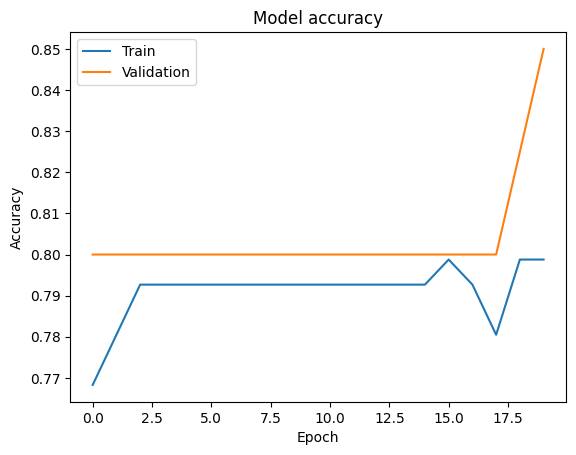

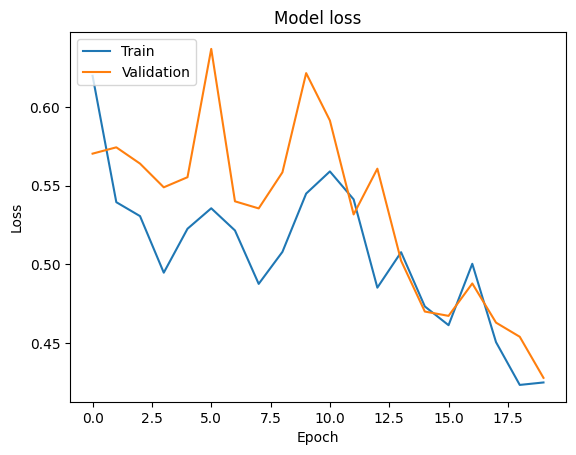

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)

    # Interpret the result
    if prediction[0][0] > 0.5:
        print("Prediction: Malignant")
    else:
        print("Prediction: Benign")

# Example usage with your specific image path
predict_image('/content/drive/MyDrive/Colab Notebooks/AI Boot Camp/Skin Cancer Detection/archive (1)/New_Skin_Data_1/data/Testing/Cancer/1714-02.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Prediction: Malignant
